In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 

In [3]:
mnist = pd.read_csv("../Dataset/mnist_train.csv")
mnist_test = pd.read_csv("../Dataset/mnist_test.csv")

In [4]:
x_train, y_train =  mnist.iloc[:, 1:].values, mnist.iloc[:, 0].values
print(x_train.shape, y_train.shape)

(60000, 784) (60000,)


In [5]:
x_test, y_test =  mnist_test.iloc[:, 1:].values, mnist_test.iloc[:, 0].values
print(x_test.shape, y_test.shape)

(10000, 784) (10000,)


In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report as cr
from sklearn.metrics import confusion_matrix as cm

In [7]:
nVals = np.arange(25,1025,25)
max_acc=0
accuracies = []

for n in nVals:
    model = RandomForestClassifier(n_estimators = n)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    acc = accuracy_score(y_test, pred)
    accuracies.append(acc)
    print("N = "+str(n)+"; Accuracy: "+str(acc))

N = 25; Accuracy: 0.9597
N = 50; Accuracy: 0.9676
N = 75; Accuracy: 0.9692
N = 100; Accuracy: 0.9691
N = 125; Accuracy: 0.9697
N = 150; Accuracy: 0.971
N = 175; Accuracy: 0.971
N = 200; Accuracy: 0.9715
N = 225; Accuracy: 0.9709
N = 250; Accuracy: 0.9713
N = 275; Accuracy: 0.9712
N = 300; Accuracy: 0.9714
N = 325; Accuracy: 0.9717
N = 350; Accuracy: 0.9715
N = 375; Accuracy: 0.9713
N = 400; Accuracy: 0.9709
N = 425; Accuracy: 0.9717
N = 450; Accuracy: 0.9714
N = 475; Accuracy: 0.9723
N = 500; Accuracy: 0.9714
N = 525; Accuracy: 0.9714
N = 550; Accuracy: 0.9717
N = 575; Accuracy: 0.9707
N = 600; Accuracy: 0.971
N = 625; Accuracy: 0.9721
N = 650; Accuracy: 0.9718
N = 675; Accuracy: 0.9713
N = 700; Accuracy: 0.9717
N = 725; Accuracy: 0.9714
N = 750; Accuracy: 0.9714
N = 775; Accuracy: 0.9716
N = 800; Accuracy: 0.971
N = 825; Accuracy: 0.9717
N = 850; Accuracy: 0.9712
N = 875; Accuracy: 0.9722
N = 900; Accuracy: 0.9719
N = 925; Accuracy: 0.9716
N = 950; Accuracy: 0.9715
N = 975; Accuracy: 

Text(0, 0.5, 'Accuracy')

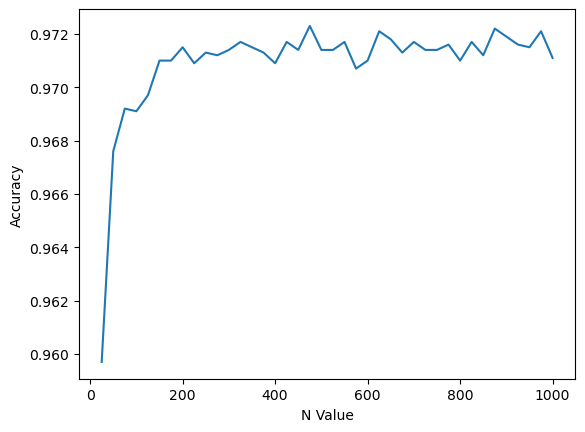

In [11]:
plt.plot(nVals, accuracies) 
plt.xlabel("N Value") 
plt.ylabel("Accuracy")

In [12]:
max(accuracies)

0.9723

In [17]:
rf = RandomForestClassifier(n_estimators = 475)
rf.fit(x_train, y_train)
pred = rf.predict(x_test)

In [18]:
print ("Classification Report")
print(cr(y_test, pred))

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.96      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.98       982
           5       0.97      0.97      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.97      0.97      1028
           8       0.97      0.95      0.96       974
           9       0.96      0.95      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



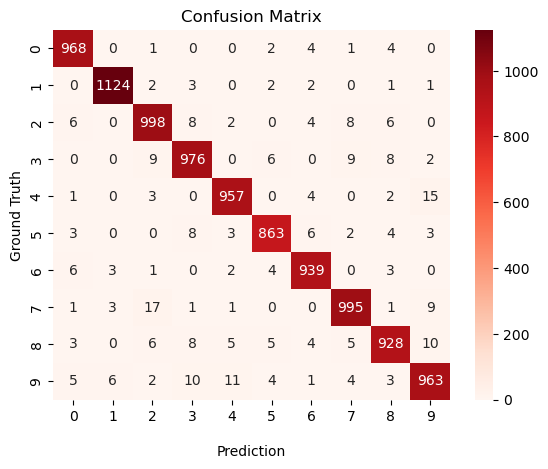

In [19]:
confusion_matrix = cm(y_test, pred)
ax = sns.heatmap(confusion_matrix, annot=True,fmt='d',cmap='Reds')
ax.set_title("Confusion Matrix");
ax.set_xlabel('\nPrediction')
ax.set_ylabel('Ground Truth');

In [20]:
confusion_matrix

array([[ 968,    0,    1,    0,    0,    2,    4,    1,    4,    0],
       [   0, 1124,    2,    3,    0,    2,    2,    0,    1,    1],
       [   6,    0,  998,    8,    2,    0,    4,    8,    6,    0],
       [   0,    0,    9,  976,    0,    6,    0,    9,    8,    2],
       [   1,    0,    3,    0,  957,    0,    4,    0,    2,   15],
       [   3,    0,    0,    8,    3,  863,    6,    2,    4,    3],
       [   6,    3,    1,    0,    2,    4,  939,    0,    3,    0],
       [   1,    3,   17,    1,    1,    0,    0,  995,    1,    9],
       [   3,    0,    6,    8,    5,    5,    4,    5,  928,   10],
       [   5,    6,    2,   10,   11,    4,    1,    4,    3,  963]],
      dtype=int64)